In [146]:
import numpy as np
import matplotlib.pyplot as plt
from PIL Import Image

In [129]:
def image_hasher(f_code):
    h = 0
    for i in range(0, len(f_code)):
        h += f_code[i] * 2**i
    return h

In [284]:
def bw_map_from_image(a_im):    
    bw_map = np.zeros(a_im.shape[0:2])
    (rows, cols) = a_im.shape[0:2]
    for r in range(0, rows):
        for c in range(0, cols):
            col = a_im[r][c]
            b_vote = 0
            w_vote = 0
            for v in col:
                if v/255 < 0.85:
                    b_vote += 1
                else:
                    w_vote += 1
            if b_vote > w_vote:
                bw_map[r][c] = 1
    return bw_map           

In [309]:
def is_white(pixel):
    return pixel[0] >= 250 and pixel[1] >= 250 and pixel[0] >= 250

In [310]:
def crop_to_bounds(image_map):
    num_rows, num_cols = image_map.shape[0:2]
    top_index, bottom_index, left_index, right_index = 0, -1, 0, -1
    arr = image_map[top_index]
    flags = [is_white(pixel) for pixel in arr]
    while False not in flags:
        top_index += 1
        arr = image_map[top_index]
        flags = [is_white(pixel) for pixel in arr]
    arr = image_map[bottom_index]
    flags = [is_white(pixel) for pixel in arr]
    while False not in flags:
        bottom_index -= 1
        arr = image_map[bottom_index]
        flags = [is_white(pixel) for pixel in arr]
    arr = [a[left_index] for a in image_map]
    flags = [is_white(pixel) for pixel in arr]
    while False not in flags:
        left_index += 1
        arr = [a[left_index] for a in image_map]
        flags = [is_white(pixel) for pixel in arr]
    arr = [a[right_index] for a in image_map]
    flags = [is_white(pixel) for pixel in arr]
    while False not in flags:
        right_index -= 1
        arr = [a[right_index] for a in image_map]
        flags = [is_white(pixel) for pixel in arr]
    return Image.fromarray(np.asarray([arr[left_index:right_index+1] for arr in image_map[top_index:bottom_index+1]]))

### Load Image

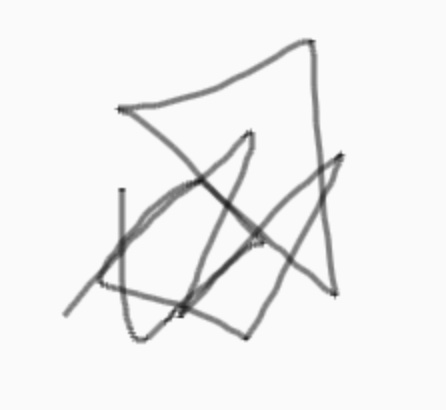

In [311]:
im = Image.open("../sample/sample1.jpg")
im

### Crop Image

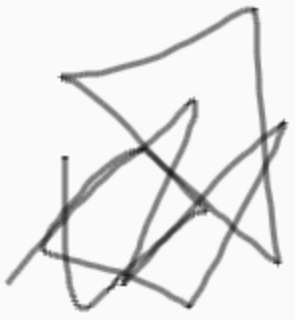

In [312]:
cropped_image = crop_to_bounds(np.asarray(im))
cropped_image

### Image Resizing

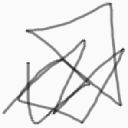

In [313]:
resized_image = cropped_image.resize((128, 128))
resized_image

### Black-white Mapping

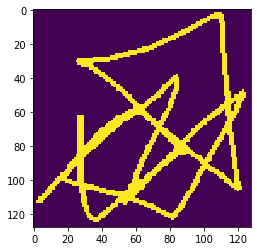

In [314]:
bw_map = bw_map_from_image(np.asarray(resized_image))
plt.imshow(bw_map)